In [1]:
import numpy as np
import matplotlib.pyplot as plt
from toksearch_d3d import PtDataSignal

  The MDSplus python module version (HEAD_release_7.139.59) does not match
  the version of the installed MDSplus libraries (unknown_release_0.0.0).
  Upgrade the module using the mdsplus/python/MDSplus directory of the
  MDSplus installation or set PYTHONPATH=/usr/local/mdsplus/python.


In [3]:
## ENTER SHOT INFO

shot=203018
x=PtDataSignal('CKXOUT').fetch(shot)


Environment variable TOKSEARCH_INDEX_DIR not set.
Environment variable TOKSEARCH_INDEX_DIR not set.
Environment variable TOKSEARCH_INDEX_DIR not set.
Environment variable TOKSEARCH_INDEX_DIR not set.


In [4]:
times = x['times']
data = x['data']

NYMODEL = 2
NYOUT_PTS = 101
NYPROF = 7

prof_data = data.reshape((-1, NYMODEL, NYOUT_PTS, NYPROF))

dens_profiles = prof_data[:, 1, :, 3]  # 3-- for density || 6 for rotation
rot_profiles = prof_data[:, 1, :, 6]
q_profiles = prof_data[:, 1, :, 2]
pres_profiles = prof_data[:, 1, :, 0]
etemp_profiles = prof_data[:, 1, :, 4]

prof_data = {
    'ne': dens_profiles,
    'rot': rot_profiles,
    'q': q_profiles,
    'pres': pres_profiles,
    'te': etemp_profiles,
}

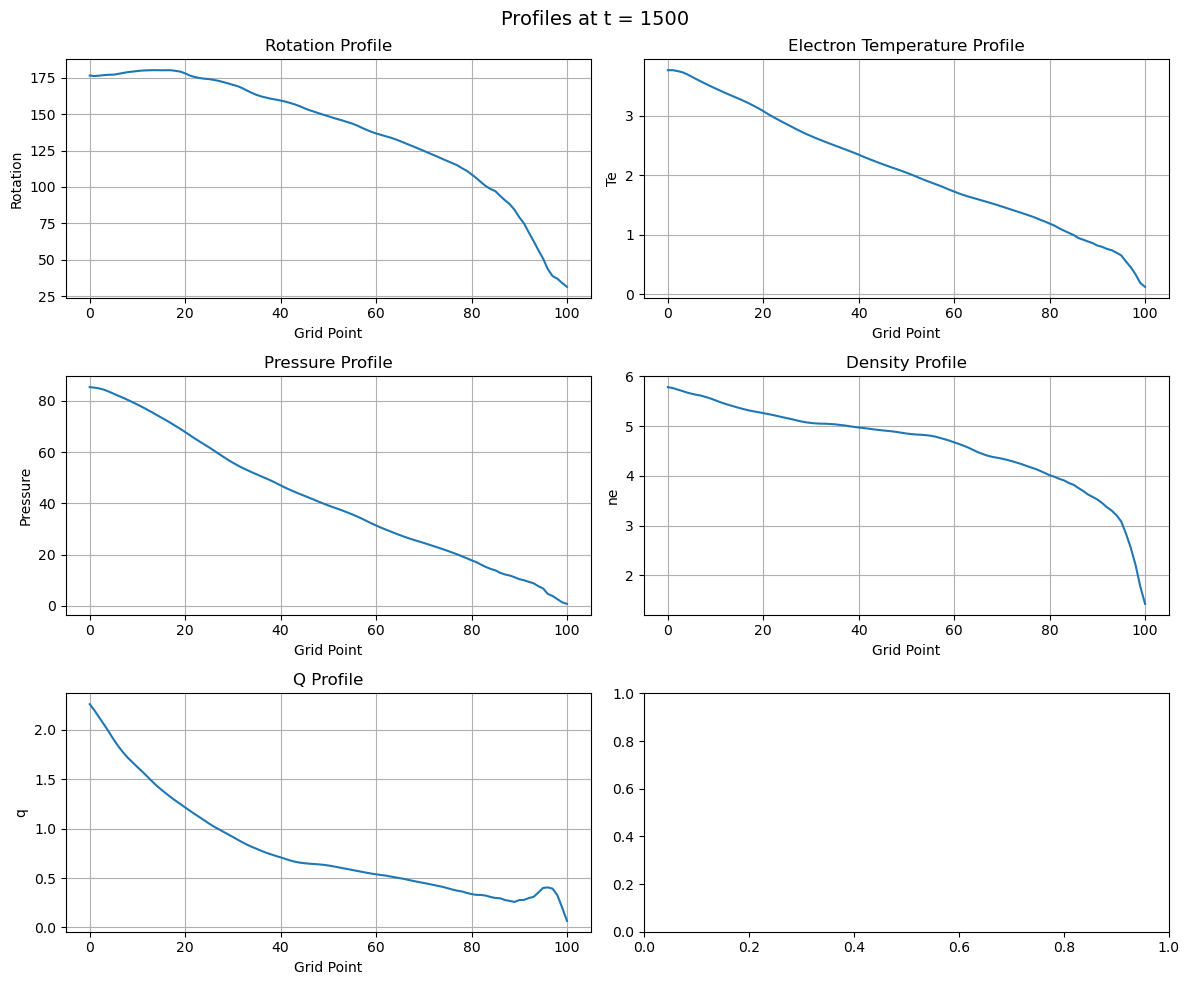

In [9]:
# plot the profiles at time

time_selected = 1500

# make 2x2 subplot

time_idx = abs(times - time_selected).argmin()

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

profiles = [
    ('rot', rot_profiles, 'Rotation Profile', 'Rotation'),
    ('te', etemp_profiles, 'Electron Temperature Profile', 'Te'),
    ('pres', pres_profiles, 'Pressure Profile', 'Pressure'),
    ('ne', dens_profiles, 'Density Profile', 'ne'),
    ('q', q_profiles, 'Q Profile','q')
]

for idx, (name, data, title, ylabel) in enumerate(profiles):
    ax = axes[idx // 2, idx % 2]
    ax.plot(data[time_idx, :])
    ax.set_title(title)
    ax.set_xlabel('Grid Point')
    ax.set_ylabel(ylabel)
    ax.grid(True)

plt.suptitle(f'Profiles at t = {time_selected}', fontsize=14)
plt.tight_layout()
plt.show()
